In [51]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import http.client
import json

In [5]:
import requests

In [77]:
connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': 'fe6e84d362e04209a463c57c2b37c997' }
connection.request('GET', '/v2/competitions/PL/scorers', None, headers )
response = json.loads(connection.getresponse().read().decode())
print(response)

{'count': 10, 'filters': {'limit': 10}, 'competition': {'id': 2021, 'area': {'id': 2072, 'name': 'England'}, 'name': 'Premier League', 'code': 'PL', 'plan': 'TIER_ONE', 'lastUpdated': '2019-01-30T23:39:42Z'}, 'season': {'id': 151, 'startDate': '2018-08-10', 'endDate': '2019-05-12', 'currentMatchday': 24, 'winner': None}, 'scorers': [{'player': {'id': 3754, 'name': 'Mohamed Salah', 'firstName': 'Mohamed Salah', 'lastName': None, 'dateOfBirth': '1992-06-15', 'countryOfBirth': 'Egypt', 'nationality': 'Egypt', 'position': 'Attacker', 'shirtNumber': 11, 'lastUpdated': '2018-11-25T05:07:31Z'}, 'team': {'id': 64, 'name': 'Liverpool FC'}, 'numberOfGoals': 16}, {'player': {'id': 7801, 'name': 'Pierre-Emerick Aubameyang', 'firstName': 'Pierre-Emerick Emiliano François', 'lastName': None, 'dateOfBirth': '1989-06-18', 'countryOfBirth': 'France', 'nationality': 'Gabon', 'position': 'Attacker', 'shirtNumber': 14, 'lastUpdated': '2018-09-19T05:12:36Z'}, 'team': {'id': 57, 'name': 'Arsenal FC'}, 'numb

In [76]:
print(json.dumps(response,indent=4))

{
    "count": 10,
    "filters": {
        "limit": 10
    },
    "competition": {
        "id": 2021,
        "area": {
            "id": 2072,
            "name": "England"
        },
        "name": "Premier League",
        "code": "PL",
        "plan": "TIER_ONE",
        "lastUpdated": "2019-01-30T23:39:42Z"
    },
    "season": {
        "id": 151,
        "startDate": "2018-08-10",
        "endDate": "2019-05-12",
        "currentMatchday": 24,
        "winner": null
    },
    "scorers": [
        {
            "player": {
                "id": 3754,
                "name": "Mohamed Salah",
                "firstName": "Mohamed Salah",
                "lastName": null,
                "dateOfBirth": "1992-06-15",
                "countryOfBirth": "Egypt",
                "nationality": "Egypt",
                "position": "Attacker",
                "shirtNumber": 11,
                "lastUpdated": "2018-11-25T05:07:31Z"
            },
            "team": {
                "i

In [78]:
df = pd.DataFrame.from_dict(json_normalize(response['scorers']), orient='columns')
print(df)

   numberOfGoals player.countryOfBirth player.dateOfBirth  \
0             16                 Egypt         1992-06-15   
1             15                France         1989-06-18   
2             14               England         1993-07-28   
3             11             Argentina         1988-06-02   
4             10               England         1992-02-27   
5             10                Brazil         1997-05-10   
6             10               Senegal         1992-04-10   
7             10               Jamaica         1994-12-08   
8             10                Serbia         1994-09-16   
9             10               England         1983-09-25   

                   player.firstName  player.id player.lastName  \
0                     Mohamed Salah       3754            None   
1  Pierre-Emerick Emiliano François       7801            None   
2                             Harry       8004            None   
3                     Sergio Leonel       7891            None  

In [72]:
scorers = df[['numberOfGoals','player.firstName']]
print (scorers)

   numberOfGoals                  player.firstName
0             16                     Mohamed Salah
1             15  Pierre-Emerick Emiliano François
2             14                             Harry
3             11                     Sergio Leonel
4             10                            Callum
5             10                       Richarlison
6             10                             Sadio
7             10                  Raheem Shaquille
8             10                        Aleksandar
9             10                             Glenn


In [71]:
scorer_df = scorers.rename(columns={'numberOfGoals':'goals', 'player.firstName':'name'})
print(scorer_df)

   goals                              name
0     16                     Mohamed Salah
1     15  Pierre-Emerick Emiliano François
2     14                             Harry
3     11                     Sergio Leonel
4     10                            Callum
5     10                       Richarlison
6     10                             Sadio
7     10                  Raheem Shaquille
8     10                        Aleksandar
9     10                             Glenn


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

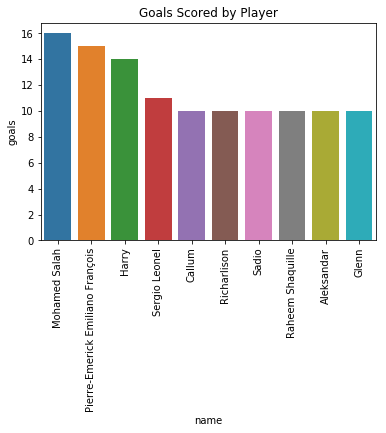

In [70]:
sns.barplot(scorer_df.name, scorer_df.goals)
plt.title('Goals Scored by Player')
plt.xticks(rotation=90)